In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.special import erf

params = {'text.usetex': False,
          'mathtext.fontset': 'stix',
            'axes.titlesize': 12,
            'xtick.labelsize': 10,
            'ytick.labelsize': 10,
            'legend.fontsize': 8,
            'legend.numpoints': 3,
            'legend.fancybox': False,
            'legend.edgecolor': 'k'}
plt.rcParams.update(params)

In [2]:
x = np.arange(5)
cell_interfaces = np.append((x-0.5), x[-1]+0.5)
cell_names = ['$x_{i-2}$', '$x_{i-1}$', '$x_{i}$', '$x_{i+1}$', '$x_{i+2}$']


s = np.array([88, 110, 3, 16, 14])
snorm = np.linalg.norm(s)
s = s/snorm

In [3]:
def SE(x, y, eldel):

    r = np.abs(x-y)
    return np.exp(-0.5*(r/eldel)**2)
    
def SE_intg(x1, x2, eldel):

    rt2 = np.sqrt(2.)
    yxp = (x1 - x2 + 1.)/(rt2*eldel)
    yxn = (x1      -x2)/(rt2*eldel)
    yxm = (x1 - x2 -1.)/(rt2*eldel)


    r = np.sqrt(np.pi)*(eldel)**2 *( yxp*erf(yxp) + yxm*erf(yxm)
      - 2.*( yxn*erf(yxn) + 1./np.sqrt(np.pi) *np.exp(-yxn**2) )
      + 1./np.sqrt(np.pi) * ( np.exp(-yxp**2) + np.exp(-yxm**2) ) )
      
    return r
    
def SE_intgVec(x, t, eldel):

    rt2 = np.sqrt(2.)
    r = eldel*np.sqrt(.5*np.pi)*(erf( (x + .5 - t)/(rt2*eldel)) - erf( (x - .5 - t)/(rt2*eldel) ))
    
    return r

def gp_pred(s, x, x_star, eldel):

    N = len(s)
    T = np.zeros(N)
    C = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            C[i,j] = SE_intg(x[i], x[j], eldel)
        T[i] = SE_intgVec(x_star, x[i], eldel)
        
    Z = np.linalg.solve(C, T)
    
    k_star = np.zeros(N)
    K = np.zeros((N,N))
    for i in range(N):
        k_star[i] = SE(x_star, x[i], eldel)
        for j in range(N):
            K[i,j] = SE(x[i], x[j], eldel)
#     var = SE(x_star, x_star, eldel) - k_star.T.dot(np.linalg.inv(K)).dot(k_star)
    
    var = SE(x_star, x_star, eldel) - Z.dot(T)

    return Z.dot(s), np.sqrt(var)

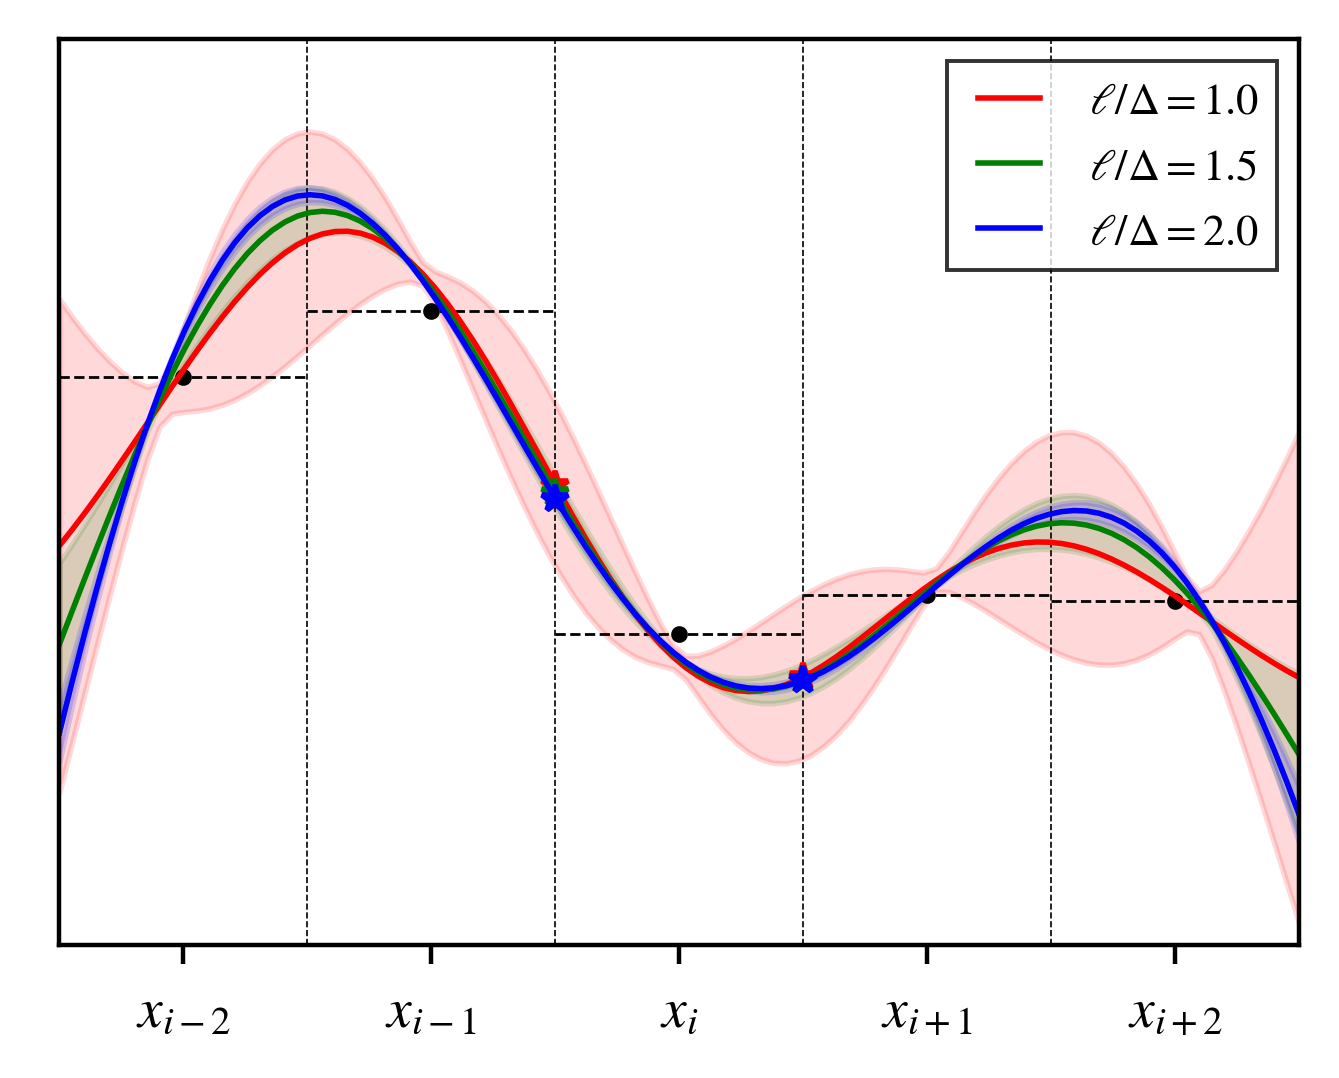

In [4]:
fig = plt.figure(figsize=(4,3), dpi=400)
ax = fig.add_subplot(1,1,1)

# vertical lines at cell interfaces
for interface in cell_interfaces:
    ax.axvline(x=interface, color='k', linestyle='--', linewidth=0.3)

# horizontal lines at cell centers
for idx, point in enumerate(s):
    ax.axhline(point, xmin=idx*0.2, xmax=(idx+1)*0.2, color='k', linestyle='--', linewidth=0.5)

ax.set_xlim((cell_interfaces[0], cell_interfaces[-1]))
ax.set_xticks(x)
ax.set_xticklabels(cell_names)

# ax.set_ylim((0,s.max()*1.4))

ax.set_yticks([])

ax.set_ylim((-100/snorm,200/snorm))


ax.plot(x, s, 'ko', markersize=2)


ximh = cell_interfaces[2]
xiph = cell_interfaces[3]

# reconstructions

# phi
# poly = recon(x, s)
# xx = np.linspace(cell_interfaces[0], cell_interfaces[-1], 100)
# ax.plot(xx, poly(xx), 'm-', linewidth=1, label='$\phi(x)$')
# ax.plot(ximh, poly(ximh), 'm*', markersize=5)


# gp prediction

_eldel = 1.0

# gp polynomial
xx = np.linspace(cell_interfaces[0], cell_interfaces[-1], 100)

gpp = np.array([gp_pred(s, x, xx[i], eldel=_eldel)[0] for i in range(100)])
gpstd = np.array([gp_pred(s, x, xx[i], eldel=_eldel)[1] for i in range(100)])

ax.plot(xx, gpp, 'r-', linewidth=1, label='$\ell/\Delta = {}$'.format(_eldel))

ax.fill_between(xx, gpp-2*gpstd, gpp+2*gpstd, color='r', alpha=0.15)

# gp Riemann states
ax.plot(ximh, gp_pred(s, x, 1.5, eldel=_eldel)[0], 'r*', markersize=5)
ax.plot(xiph, gp_pred(s, x, 2.5, eldel=_eldel)[0], 'r*', markersize=5)





_eldel = 1.5

# gp polynomial
xx = np.linspace(cell_interfaces[0], cell_interfaces[-1], 100)

gpp = np.array([gp_pred(s, x, xx[i], eldel=_eldel)[0] for i in range(100)])
gpstd = np.array([gp_pred(s, x, xx[i], eldel=_eldel)[1] for i in range(100)])

ax.plot(xx, gpp, 'g-', linewidth=1, label='$\ell/\Delta = {}$'.format(_eldel))

ax.fill_between(xx, gpp-2*gpstd, gpp+2*gpstd, color='g', alpha=0.15)

# gp Riemann states
ax.plot(ximh, gp_pred(s, x, 1.5, eldel=_eldel)[0], 'g*', markersize=5)
ax.plot(xiph, gp_pred(s, x, 2.5, eldel=_eldel)[0], 'g*', markersize=5)






_eldel = 2.0

# gp polynomial
xx = np.linspace(cell_interfaces[0], cell_interfaces[-1], 100)

gpp = np.array([gp_pred(s, x, xx[i], eldel=_eldel)[0] for i in range(100)])
gpstd = np.array([gp_pred(s, x, xx[i], eldel=_eldel)[1] for i in range(100)])

ax.plot(xx, gpp, 'b-', linewidth=1, label='$\ell/\Delta = {}$'.format(_eldel))

ax.fill_between(xx, gpp-2*gpstd, gpp+2*gpstd, color='b', alpha=0.15)

# gp Riemann states
ax.plot(ximh, gp_pred(s, x, 1.5, eldel=_eldel)[0], 'b*', markersize=5)
ax.plot(xiph, gp_pred(s, x, 2.5, eldel=_eldel)[0], 'b*', markersize=5)




legend = ax.legend(loc='upper right')
legend.get_frame().set_linewidth(.7)

fig.savefig('gp_linear_recon.pdf', bbox_inches='tight', pad_inches=0.05)

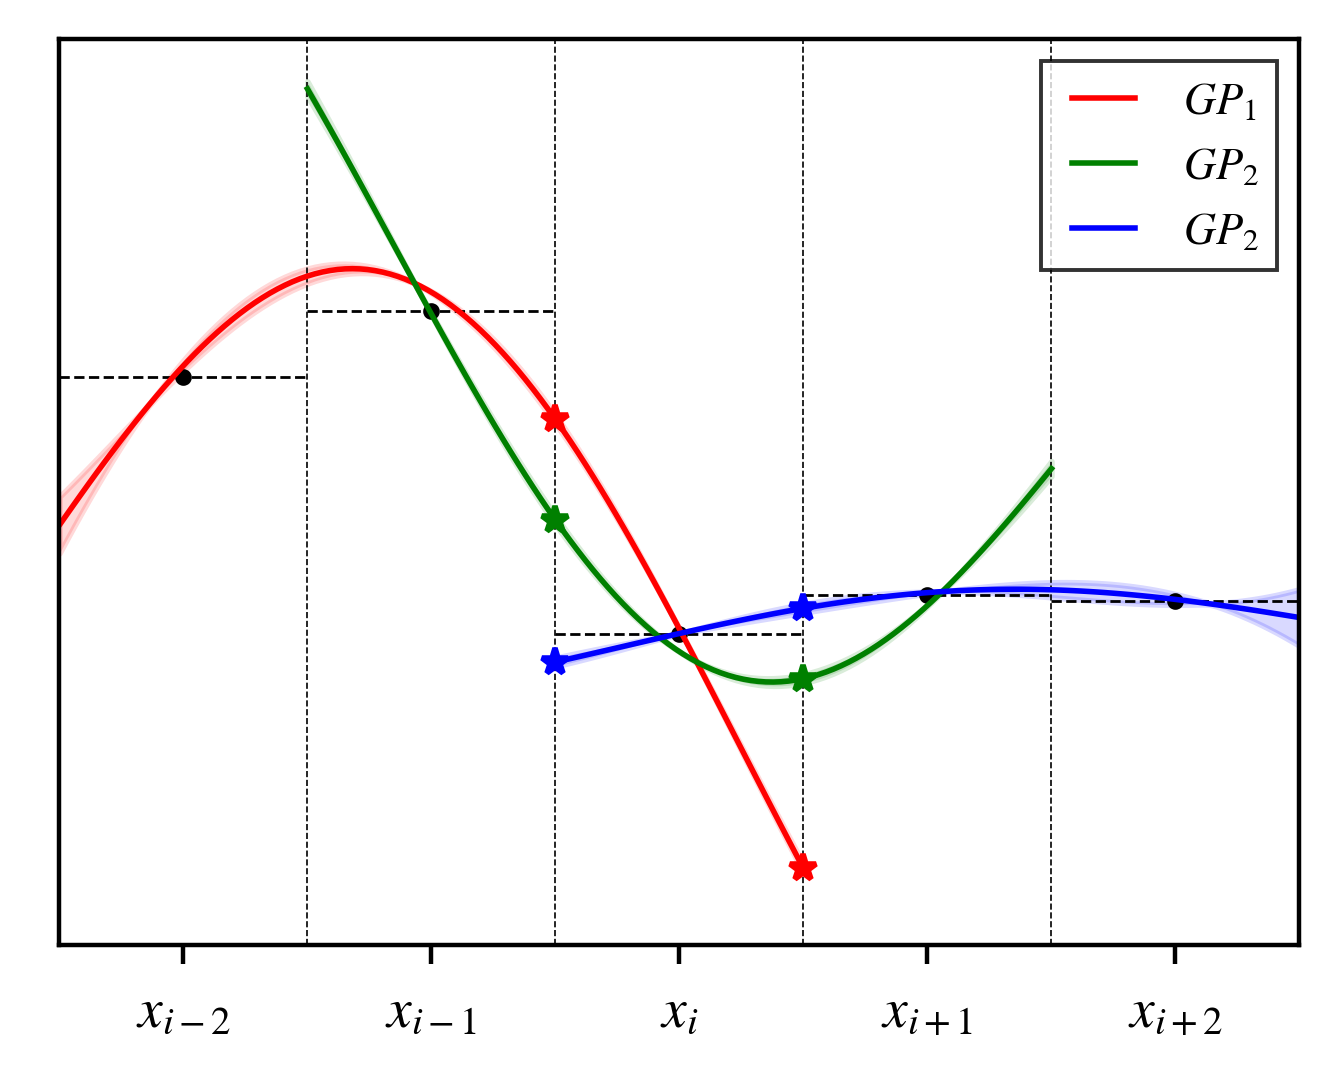

In [5]:
fig = plt.figure(figsize=(4,3), dpi=400)
ax = fig.add_subplot(1,1,1)

# vertical lines at cell interfaces
for interface in cell_interfaces:
    ax.axvline(x=interface, color='k', linestyle='--', linewidth=0.3)

# horizontal lines at cell centers
for idx, point in enumerate(s):
    ax.axhline(point, xmin=idx*0.2, xmax=(idx+1)*0.2, color='k', linestyle='--', linewidth=0.5)

ax.set_xlim((cell_interfaces[0], cell_interfaces[-1]))
ax.set_xticks(x)
ax.set_xticklabels(cell_names)

# ax.set_ylim((0,s.max()*1.4))

ax.set_yticks([])

ax.set_ylim((-100/snorm,200/snorm))


ax.plot(x, s, 'ko', markersize=2)


ximh = cell_interfaces[2]
xiph = cell_interfaces[3]


# gp prediction

_eldel = 2.0

# gp polynomial1
xx = np.linspace(cell_interfaces[0], cell_interfaces[3], 100)

gpp = np.array([gp_pred(s[0:3], x[0:3], xx[i], eldel=_eldel)[0] for i in range(100)])
gpstd = np.array([gp_pred(s, x, xx[i], eldel=_eldel)[1] for i in range(100)])

ax.plot(xx, gpp, 'r-', linewidth=1, label='$GP_{1}$')

ax.fill_between(xx, gpp-2*gpstd, gpp+2*gpstd, color='r', alpha=0.15)

# gp Riemann states
ax.plot(ximh, gp_pred(s[0:3], x[0:3], 1.5, eldel=_eldel)[0], 'r*', markersize=5)
ax.plot(xiph, gp_pred(s[0:3], x[0:3], 2.5, eldel=_eldel)[0], 'r*', markersize=5)


# gp polynomial2
xx = np.linspace(cell_interfaces[1], cell_interfaces[4], 100)

gpp = np.array([gp_pred(s[1:4], x[1:4], xx[i], eldel=_eldel)[0] for i in range(100)])
gpstd = np.array([gp_pred(s, x, xx[i], eldel=_eldel)[1] for i in range(100)])

ax.plot(xx, gpp, 'g-', linewidth=1, label='$GP_{2}$')

ax.fill_between(xx, gpp-2*gpstd, gpp+2*gpstd, color='g', alpha=0.15)

# gp Riemann states
ax.plot(ximh, gp_pred(s[1:4], x[1:4], 1.5, eldel=_eldel)[0], 'g*', markersize=5)
ax.plot(xiph, gp_pred(s[1:4], x[1:4], 2.5, eldel=_eldel)[0], 'g*', markersize=5)



# gp polynomial3
xx = np.linspace(cell_interfaces[2], cell_interfaces[5], 100)

gpp = np.array([gp_pred(s[2:5], x[2:5], xx[i], eldel=_eldel)[0] for i in range(100)])
gpstd = np.array([gp_pred(s, x, xx[i], eldel=_eldel)[1] for i in range(100)])

ax.plot(xx, gpp, 'b-', linewidth=1, label='$GP_{2}$')

ax.fill_between(xx, gpp-2*gpstd, gpp+2*gpstd, color='b', alpha=0.15)

# gp Riemann states
ax.plot(ximh, gp_pred(s[2:5], x[2:5], 1.5, eldel=_eldel)[0], 'b*', markersize=5)
ax.plot(xiph, gp_pred(s[2:5], x[2:5], 2.5, eldel=_eldel)[0], 'b*', markersize=5)



legend = ax.legend(loc='upper right')
legend.get_frame().set_linewidth(.7)

# fig.savefig('gp_weno_recon.pdf', bbox_inches='tight', pad_inches=0.05)

In [6]:
# start to calculate non linear weights for GP

sigdel = 1.0
eldel = 2.0



# all stencil
N = len(s)
T = np.zeros((N,2))
C = np.zeros((N,N))
Z = np.zeros((N,2))
for i in range(N):
    for j in range(N):
        C[i,j] = SE_intg(x[i], x[j], eldel)
    T[i,0] = SE_intgVec(1.5, x[i], eldel)
    T[i,1] = SE_intgVec(2.5, x[i], eldel)

Z[:,0] = np.linalg.solve(C, T[:,0])
Z[:,1] = np.linalg.solve(C, T[:,1])

N = 3

Tk = np.zeros((N,2))
Ck = np.zeros((N,N))
Zk = np.zeros((N,3,2))

Zm = np.zeros((3,3,3))
Pk = np.zeros(N)

# ENO stencil
for m in range(N):
    for i in range(N):
        for j in range(N):
            Ck[i,j] = SE_intg(x[i+m], x[j+m], eldel)
        Tk[i,0] = SE_intgVec(1.5, x[i+m], eldel)
        Tk[i,1] = SE_intgVec(2.5, x[i+m], eldel)
        
    # for linear weights
    Zk[:,m,0] = np.linalg.solve(Ck, Tk[:,0])   # left
    Zk[:,m,1] = np.linalg.solve(Ck, Tk[:,1])   # right

    # for smoothness indicators
    for i in range(N):
        for j in range(N):
            Pk[j] = SE_intgVec(x[i], x[j], eldel) 
        Zm[:,i,m] = np.linalg.solve(Ck, Pk)
        
        
# solve least square for linear weights
Zmat = np.zeros((5,3,2))
gp_linW = np.zeros((3,2))

for LR in range(2):
    for m in range(3):
        Zmat[0+m:3+m,m,LR] = Zk[:,m,LR]
        
    gp_linW[:,LR] = np.linalg.lstsq(Zmat[:,:,LR], Z[:,LR], rcond=None)[0]

In [7]:
Cm = np.zeros((3,3))
for i in range(3):
    for j in range(3):
        Cm[i,j] = SE(i, j, sigdel)
eigvals, eigvecs = np.linalg.eig(Cm)

        
Pvecs = np.zeros((3,3))
for i in range(3):
    for j in range(3):
        Pvecs[j,i] = np.dot(eigvecs[:,i], Zm[j,:,1])/np.sqrt(eigvals[i])

gp_beta = np.zeros(3)
for m in range(3):
    gp_beta[m] = (np.dot(s[m:m+3], Pvecs[:,1]))**2
    for i in range(2):
        gp_beta[m] = gp_beta[m] + (np.dot(s[m:m+3], Pvecs[:,i]))**2

In [8]:
wbar = np.zeros((3,2))
gp_nonLinW = np.zeros((3,2))

for LR in range(2):
    wbar[:,LR] = gp_linW[:,LR]/(1.E-36 + gp_beta[:])**2

# normalize
gp_nonLinW[:,0] = wbar[:,0]/np.linalg.norm(wbar[:,0])
gp_nonLinW[:,1] = wbar[:,1]/np.linalg.norm(wbar[:,1])

In [23]:
gp_nonLinW[:,1]   # done!

array([1.67337581e-04, 7.59060712e-04, 9.99999698e-01])

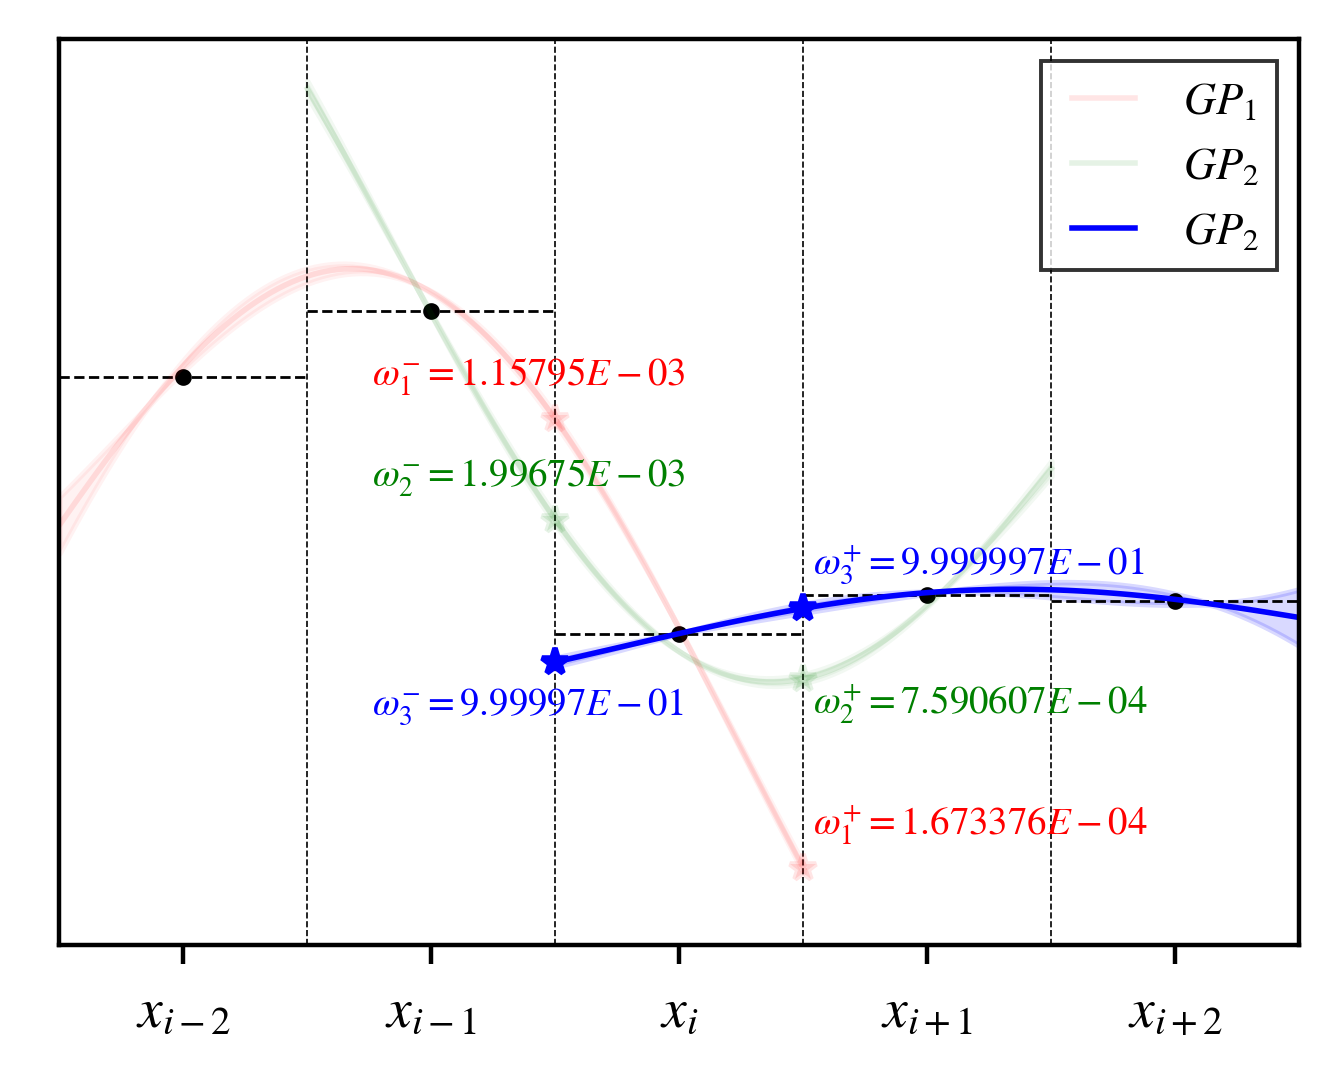

In [10]:
fig = plt.figure(figsize=(4,3), dpi=400)
ax = fig.add_subplot(1,1,1)

# vertical lines at cell interfaces
for interface in cell_interfaces:
    ax.axvline(x=interface, color='k', linestyle='--', linewidth=0.3)

# horizontal lines at cell centers
for idx, point in enumerate(s):
    ax.axhline(point, xmin=idx*0.2, xmax=(idx+1)*0.2, color='k', linestyle='--', linewidth=0.5)

ax.set_xlim((cell_interfaces[0], cell_interfaces[-1]))
ax.set_xticks(x)
ax.set_xticklabels(cell_names)

# ax.set_ylim((0,s.max()*1.4))

ax.set_yticks([])

ax.set_ylim((-100/snorm,200/snorm))


ax.plot(x, s, 'ko', markersize=2)


ximh = cell_interfaces[2]
xiph = cell_interfaces[3]


# gp prediction

_eldel = 2.0

opac_imh = 0.1 + 0.9*gp_nonLinW[:,0]
opac_iph = 0.1 + 0.9*gp_nonLinW[:,1]

gp_imh = np.zeros(3)
gp_imh[0] = gp_pred(s[0:3], x[0:3], ximh, eldel=_eldel)[0]
gp_imh[1] = gp_pred(s[1:4], x[1:4], ximh, eldel=_eldel)[0]
gp_imh[2] = gp_pred(s[2:5], x[2:5], ximh, eldel=_eldel)[0]

gp_iph = np.zeros(3)
gp_iph[0] = gp_pred(s[0:3], x[0:3], xiph, eldel=_eldel)[0]
gp_iph[1] = gp_pred(s[1:4], x[1:4], xiph, eldel=_eldel)[0]
gp_iph[2] = gp_pred(s[2:5], x[2:5], xiph, eldel=_eldel)[0]




# gp polynomial1
xx = np.linspace(cell_interfaces[0], cell_interfaces[3], 100)

gpp = np.array([gp_pred(s[0:3], x[0:3], xx[i], eldel=_eldel)[0] for i in range(100)])
gpstd = np.array([gp_pred(s, x, xx[i], eldel=_eldel)[1] for i in range(100)])

ax.plot(xx, gpp, 'r-', linewidth=1, label='$GP_{1}$', alpha=opac_imh[0])

ax.fill_between(xx, gpp-2*gpstd, gpp+2*gpstd, color='r', alpha=0.05)

# gp Riemann states
ax.plot(ximh, gp_imh[0], 'r*', markersize=5, alpha=opac_imh[0])
ax.plot(xiph, gp_iph[0], 'r*', markersize=5, alpha=opac_imh[0])


# gp polynomial2
xx = np.linspace(cell_interfaces[1], cell_interfaces[4], 100)

gpp = np.array([gp_pred(s[1:4], x[1:4], xx[i], eldel=_eldel)[0] for i in range(100)])
gpstd = np.array([gp_pred(s, x, xx[i], eldel=_eldel)[1] for i in range(100)])

ax.plot(xx, gpp, 'g-', linewidth=1, label='$GP_{2}$', alpha=opac_imh[1])

ax.fill_between(xx, gpp-2*gpstd, gpp+2*gpstd, color='g', alpha=0.05)

# gp Riemann states
ax.plot(ximh, gp_imh[1], 'g*', markersize=5, alpha=opac_imh[1])
ax.plot(xiph, gp_iph[1], 'g*', markersize=5, alpha=opac_imh[1])



# gp polynomial3
xx = np.linspace(cell_interfaces[2], cell_interfaces[5], 100)

gpp = np.array([gp_pred(s[2:5], x[2:5], xx[i], eldel=_eldel)[0] for i in range(100)])
gpstd = np.array([gp_pred(s, x, xx[i], eldel=_eldel)[1] for i in range(100)])

ax.plot(xx, gpp, 'b-', linewidth=1, label='$GP_{2}$', alpha=opac_imh[2])

ax.fill_between(xx, gpp-2*gpstd, gpp+2*gpstd, color='b', alpha=0.15)

# gp Riemann states
ax.plot(ximh, gp_imh[2], 'b*', markersize=5, alpha=opac_imh[2])
ax.plot(xiph, gp_iph[2], 'b*', markersize=5, alpha=opac_imh[2])



# non linear weights
ax.text(ximh-.74, gp_imh[0]+.08, '$\omega_{{1}}^{{-}} = {0:.5E}$'.format(gp_nonLinW[0,0]), size=7, color='r')
ax.text(ximh-.74, gp_imh[1]+.08, '$\omega_{{2}}^{{-}} = {0:.5E}$'.format(gp_nonLinW[1,0]), size=7, color='g')
ax.text(ximh-.74, gp_imh[2]-.12, '$\omega_{{3}}^{{-}} = {0:.5E}$'.format(gp_nonLinW[2,0]), size=7, color='b')


ax.text(xiph+.04, gp_iph[0]+.08, '$\omega_{{1}}^{{+}} = {0:.6E}$'.format(gp_nonLinW[0,1]), size=7, color='r')
ax.text(xiph+.04, gp_iph[1]-.08, '$\omega_{{2}}^{{+}} = {0:.6E}$'.format(gp_nonLinW[1,1]), size=7, color='g')
ax.text(xiph+.04, gp_iph[2]+.08, '$\omega_{{3}}^{{+}} = {0:.6E}$'.format(gp_nonLinW[2,1]), size=7, color='b')


legend = ax.legend(loc='upper right')
legend.get_frame().set_linewidth(.7)

fig.savefig('gp_weno_nonlinW.pdf', bbox_inches='tight', pad_inches=0.05)